# L2: Llama API Quickstart

<p style="background-color:#fff6e4; padding:15px; border-width:3px; border-color:#f5ecda; border-style:solid; border-radius:6px"> ⏳ <b>Note <code>(Kernel Starting)</code>:</b> This notebook takes about 30 seconds to be ready to use. You may start and watch the video while you wait.</p>

In [9]:
import sys
!{sys.executable} -m pip install python-dotenv
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install -r requirements.txt

  Using cached matplotlib-3.10.3-cp313-cp313-macosx_11_0_arm64.whl.metadata (11 kB)
  Using cached contourpy-1.3.2-cp313-cp313-macosx_11_0_arm64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.8-cp313-cp313-macosx_11_0_arm64.whl.metadata (6.2 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
Using cached matplotlib-3.10.3-cp313-cp313-macosx_11_0_arm64.whl (8.1 MB)
Using cached contourpy-1.3.2-cp313-cp313-macosx_11_0_arm64.whl (255 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 27.3 MB/s eta 0:00:00
Using cached kiwisolver-1.4.8-cp313-cp313-macosx_11_0_arm64.whl (65 kB)
Using cached pyparsing-3.2.3-py3-none-any.whl (111 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6/6 [matplotlib]6 [matplotlib]


In [1]:
import warnings
warnings.filterwarnings('ignore')

## Load API keys and libraries

In [2]:
import os
from utils import get_llama_api_key, get_llama_base_url

llama_api_key = get_llama_api_key()
llama_base_url = get_llama_base_url()

from llama_api_client import LlamaAPIClient

In [3]:
print(llama_base_url)

https://api.llama.com/compat/v1/


<div style="background-color:#fff6ff; padding:13px; border-width:3px; border-color:#efe6ef; border-style:solid; border-radius:6px">
<p> 💻 &nbsp; <b>Access <code>requirements.txt</code> and <code>helper.py</code> files:</b> 1) click on the <em>"File"</em> option on the top menu of the notebook and then 2) click on <em>"Open"</em>.</p>

<p> ⬇ &nbsp; <b>Download Notebooks:</b> 1) click on the <em>"File"</em> option on the top menu of the notebook and then 2) click on <em>"Download as"</em> and select <em>"Notebook (.ipynb)"</em>.</p>

<p> 📒 &nbsp; For more help, please see the <em>"Appendix – Tips, Help, and Download"</em> Lesson.</p>
</div>

## Llama API client Python library

In [4]:
def llama4(prompt, image_urls=[],
    model="Llama-4-Scout-17B-16E-Instruct-FP8"  # or Llama-4-Maverick-17B-128E-Instruct-FP8
):
  image_urls_content = []
  for url in image_urls:
    image_urls_content.append(
        {"type": "image_url", "image_url": {"url": url}})

  content = [{"type": "text", "text": prompt}]
  content.extend(image_urls_content)

  client = LlamaAPIClient(api_key=llama_api_key)

  response = client.chat.completions.create(
    model=model,
    messages=[{
        "role": "user",
        "content": content
    }],
    temperature=0
  )
  return response.completion_message.content.text

In [5]:
print(llama4("A brief history of AI in 3 short sentences."))

Here is a brief history of AI in 3 short sentences:

The term "Artificial Intelligence" was coined in 1956 by computer scientist John McCarthy, marking the beginning of AI as a field of research. The 1950s and 1960s saw the development of the first AI programs, including rule-based systems and neural networks, which aimed to mimic human intelligence. In the decades that followed, AI research ebbed and flowed, but recent advances in machine learning and deep learning have led to significant breakthroughs and applications in areas like computer vision, natural language processing, and robotics.


## Using OpenAI-compatible library

### No idea how to set LLAMA_BASE_URL to use OpenAI-compatible library

In [6]:
from openai import OpenAI

def llama4(prompt,
    image_urls=[],
    model="Llama-4-Scout-17B-16E-Instruct-FP8",  # or Llama-4-Maverick-17B-128E-Instruct-FP8
    debug=False
):
  image_urls_content = []
  for url in image_urls:
    image_urls_content.append(
        {"type": "image_url", "image_url": {"url": url}}) # TODO: for local image use {"url": "data:image/png;base64,..."}}

  content = [{"type": "text", "text": prompt}]
  content.extend(image_urls_content)

  client = OpenAI(api_key=llama_api_key, base_url=llama_base_url)

  response = client.chat.completions.create(
    model=model,
    messages=[{
        "role": "user",
        "content": content
    }],
    temperature=0
  )

  if debug:
    print(response)

  return response.choices[0].message.content

In [7]:
print(llama4("A brief history of AI in 3 short sentences."))

Here is a brief history of AI in 3 short sentences:

The term "Artificial Intelligence" was coined in 1956 by computer scientist John McCarthy, marking the beginning of AI as a field of research. The 1950s and 1960s saw the development of the first AI programs, including rule-based systems and neural networks, which aimed to mimic human intelligence. In the decades that followed, AI research ebbed and flowed, but recent advances in machine learning and deep learning have led to significant breakthroughs and applications in areas like computer vision, natural language processing, and robotics.


## Asking question about a single image

In [8]:
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt

def display_image(image_url):
    response = requests.get(image_url)
    img = Image.open(BytesIO(response.content))
    plt.imshow(img)
    plt.axis('off')
    plt.show()

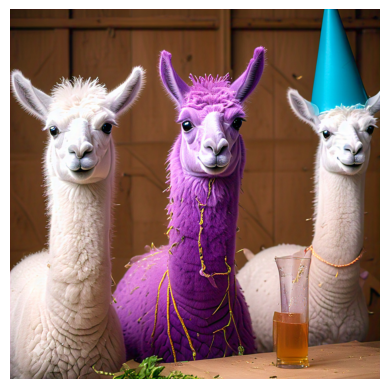

In [20]:
img_url = "https://raw.githubusercontent.com/meta-llama/llama-models/refs/heads/main/Llama_Repo.jpeg"
display_image(img_url)

In [21]:
print(llama4("What's in the image?", [img_url]))

The image depicts three llamas, each with distinct characteristics. The llama on the left is white and has a normal appearance. The middle llama is also white but has been digitally altered to have a purple hue and yellow string-like objects attached to its fur. The llama on the right is white, wearing a blue party hat and an orange beaded necklace.

In front of the llamas, there is a glass containing a brown liquid, possibly beer or another beverage. The background of the image features a wooden wall, which adds a rustic touch to the scene. Overall, the image presents a unique and playful depiction of llamas in a celebratory setting.


## Asking question about multiple images

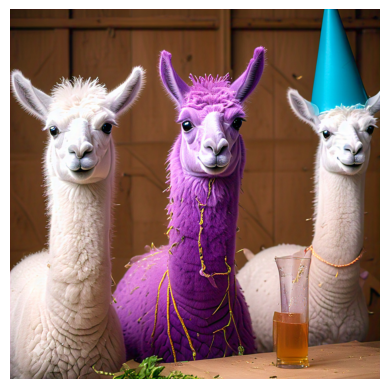

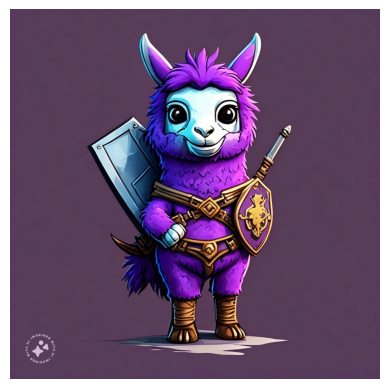

In [25]:
img_url2 = "https://raw.githubusercontent.com/meta-llama/PurpleLlama/refs/heads/main/logo.png"
display_image(img_url)
display_image(img_url2)

In [26]:
print(llama4("Compare these two images.", [img_url, img_url2]))

The two images depict llamas in different settings and styles. The first image shows three llamas, two white and one purple, sitting at a table with a glass of beer, while the second image features a single purple llama dressed as a warrior.

**Key Differences:**

* **Setting:** The first image is set in a rustic or rural environment, possibly a barn or stable, while the second image has a more fantastical or cartoonish background.
* **Style:** The first image appears to be a realistic depiction of llamas, while the second image is a stylized illustration with exaggerated features.
* **Color Scheme:** The first image features a muted color palette with shades of brown, white, and purple, while the second image has a bold and vibrant color scheme with purples, golds, and whites.
* **Mood:** The first image conveys a sense of relaxation and camaraderie among the llamas, while the second image suggests a more adventurous and heroic tone.

**Similarities:**

* **Subject Matter:** Both imag

## Llama 4 Long Context

In [27]:
with open("A-tale-of-two-cities.txt", "r", encoding='utf=8') as file:
    tale = file.read()

In [28]:
question = """What's the last utterance Sydney Carton would have given
at the end of the book A Tale of Two Cities? Just give one.
What's the paragraph before the last utterance?
"""

In [29]:
print(llama4(f"{question} The book content is below: {tale[300000:]}",
      model="Llama-4-Maverick-17B-128E-Instruct-FP8"))

The last utterance Sydney Carton would have given at the end of the book A Tale of Two Cities is: 

"I see that I hold a sanctuary in their hearts, and in the hearts of their descendants, generations hence. I see her, an old woman, weeping for me on the anniversary of this day. I see her and her husband, their course done, lying side by side in their last earthly bed, and I know that each was not more honoured and held sacred in the other's soul, than I was in the souls of both. 

"I see that child who lay upon her bosom and who bore my name, a man winning his way up in that path of life which once was mine. I see him winning it so well, that my name is made illustrious there by the light of his. I see the blots I threw upon it, faded away. I see him, fore-most of just judges and honoured men, bringing a boy of my name, with a forehead that I know and golden hair, to this place--then fair to look upon, with not a trace of this day's disfigurement--and I hear him tell the child my story

## Llama 4 Multilingual Support

In [30]:
question = """how many languages do you understand?
answer in all the languages you can speak."""

print(llama4(question))

What a fascinating request! I can understand and respond in multiple languages. Here's a list of languages I'm familiar with:

**Text-based languages:**

1. **English** - I can understand and respond in English, which is my primary language.
2. **Spanish** - Puedo entender y responder en español. (I can understand and respond in Spanish.)
3. **French** - Je peux comprendre et répondre en français. (I can understand and respond in French.)
4. **German** - Ich kann verstehen und auf Deutsch antworten. (I can understand and respond in German.)
5. **Italian** - Posso capire e rispondere in italiano. (I can understand and respond in Italian.)
6. **Portuguese** - Posso entender e responder em português. (I can understand and respond in Portuguese.)
7. **Chinese (Simplified)** - (wǒ kěyǐ lǐjiě hé huí fù yī xiē zhōng wén) (I can understand and respond in some Chinese.)
8. **Japanese** - (watashi wa nihongo o rikai shi, kotae o dasu koto ga dekimasu) (I can understand and respond in some Japane

In [9]:
client = OpenAI(api_key=llama_api_key, base_url=llama_base_url)

class Polyglot:
    def __init__(self, source="English", target="French", model="Llama-4-Scout-17B-16E-Instruct-FP8"):
        system = f"""You're a bilingual translator between two people:
          the first person only speaks {source} and
          the second person only speaks {target}.
          For any user input, return as follows:
          1. Recognized language: <the languege of the input,
          either {source} or {target}>
          2. Translation of the input: <the translation of the input to
          the other language
          3. Answer to the input: <in the same language as the
          recognized language of the input>"""
        self.messages = [{"role": "system", "content": system}]
        self.model = model

    def __call__(self, message):
        self.messages.append({"role": "user", "content": message})
        result = self.execute()
        self.messages.append({"role": "assistant", "content": result})
        return result

    def execute(self):
        response = client.chat.completions.create(
                        model=self.model,
                        temperature=0,
                        messages=self.messages)
        return response.choices[0].message.content

In [10]:
agent = Polyglot(source="English", target="French")

In [11]:
result = agent("Hello!")
print(result)

Here's the response:

1. Recognized language: English
2. Translation of the input: Bonjour!
3. Answer to the input: Hello! How are you today?


In [12]:
print(agent("How do you say the weather is nice in French?"))

Here's the response:

1. Recognized language: English
2. Translation of the input: Comment dit-on que le temps est agréable en français?
3. Answer to the input: You can say "The weather is nice" in French as "Le temps est agréable" or more commonly, "Il fait beau".
